# <img align="right" src="https://www.tedu.edu.tr/themes/custom/tedu/logo.svg" width="350px" height="350px"/>
<h1 style="font-size:16pt"> ADS 542 Statistical Learning Project Spring 2025  </h1><br/>
<b> Author: </b> Duygu Halim Kırlı <br/>
<b> Date: </b> 12 May 2025 <br/>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import zipfile
import io
import requests
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Data

In [2]:

data=pd.read_csv("bank-additional.csv", sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [6]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome','y']

#### definition of some variables:
month: last contact month

day of week: last contact day

duration: last contact duration

campaing:numbar of contacts during this campaign for this client

pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client

poutcome: outcome of the previous marketing campaign 

emp.var.rate: employment variation rate - quarterly indicator 

cons.price.idx: consumer price index - monthly indicator 

cons.conf.idx: consumer confidence index - monthly indicator 

euribor3m: euribor 3 month rate - daily indicator 

nr.employed: number of employees - quarterly indicator 

y - has the client subscribed a term deposit? (binary: 'yes','no')


In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
###the range of variables differs, it looks like to need scaling.

In [9]:
#checking for empty/NaN data
data.isnull().mean()

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

##### There is no missing values in this dataset

### Visualization for Better Understanding Data

##### In this part, look for target varible and independent numeric and categorical varibles to understand the data better

##### target variable y

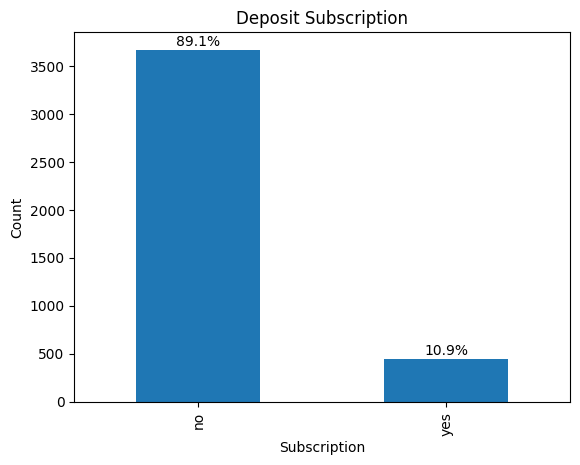

In [11]:
# Value counts
counts = data['y'].value_counts()

# percentage
percentages = data['y'].value_counts(normalize=True) * 100

ax = counts.plot(kind='bar', title='Deposit Subscription')

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    plt.text(i, count + max(counts)*0.01, f'{percentage:.1f}%', ha='center')

plt.ylabel('Count')
plt.xlabel('Subscription')
plt.show()

In [12]:
## y variable is distrubted imbalanced way, deposit subscription is only ten percent.

##### Numeric Varibles Histogram

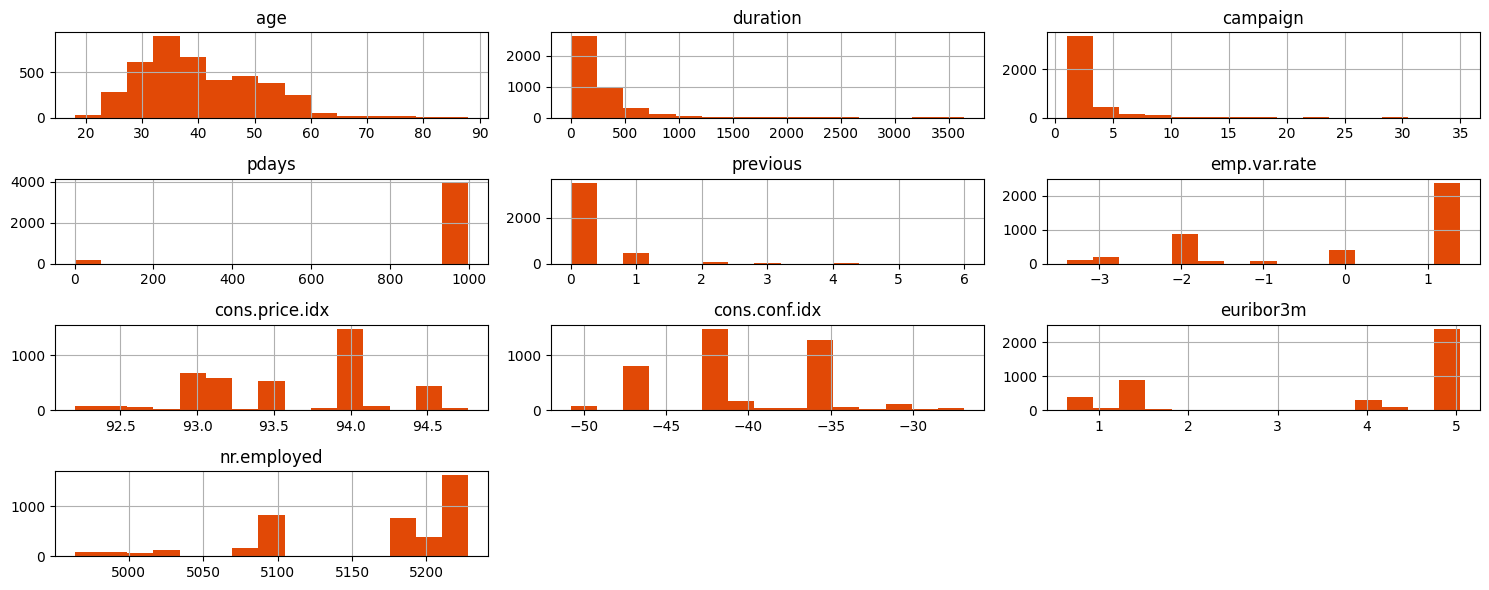

In [13]:
data[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(4, 3), color='#E14906')
plt.tight_layout()
plt.show()

##### Categorical Varibles Histogram


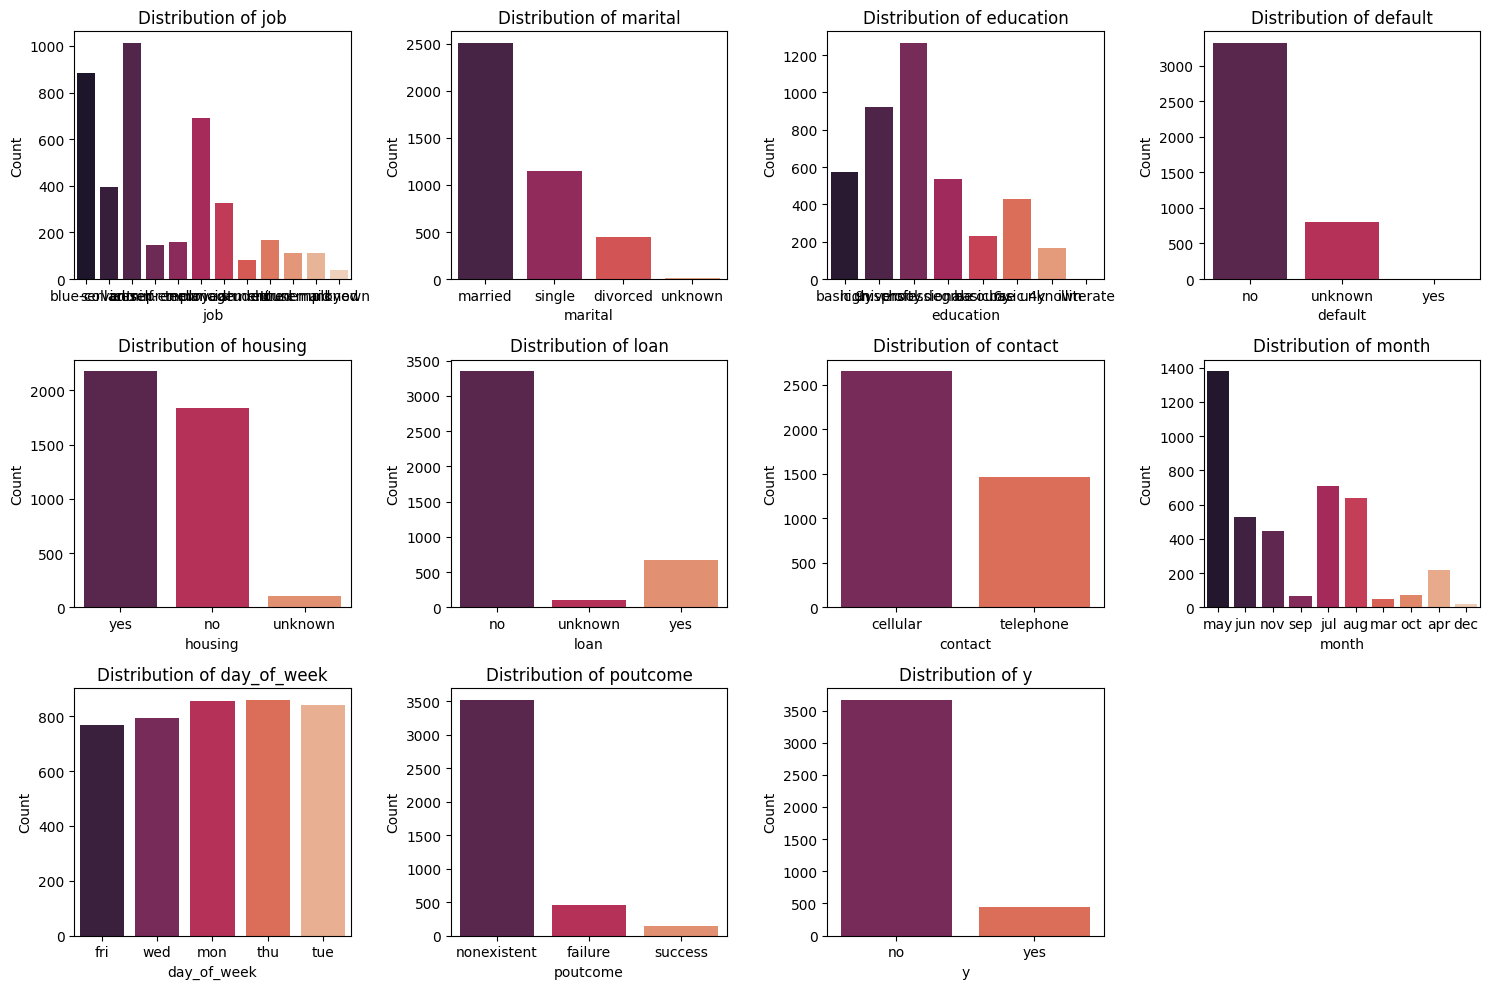

In [14]:

plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_cols):
    plt.subplot(3, 4, i+1)  # 3 rows, 4 columns layout
    sns.countplot(x=feature, data=data, palette='rocket')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### Numeric Varibles Distribution by Target Varible

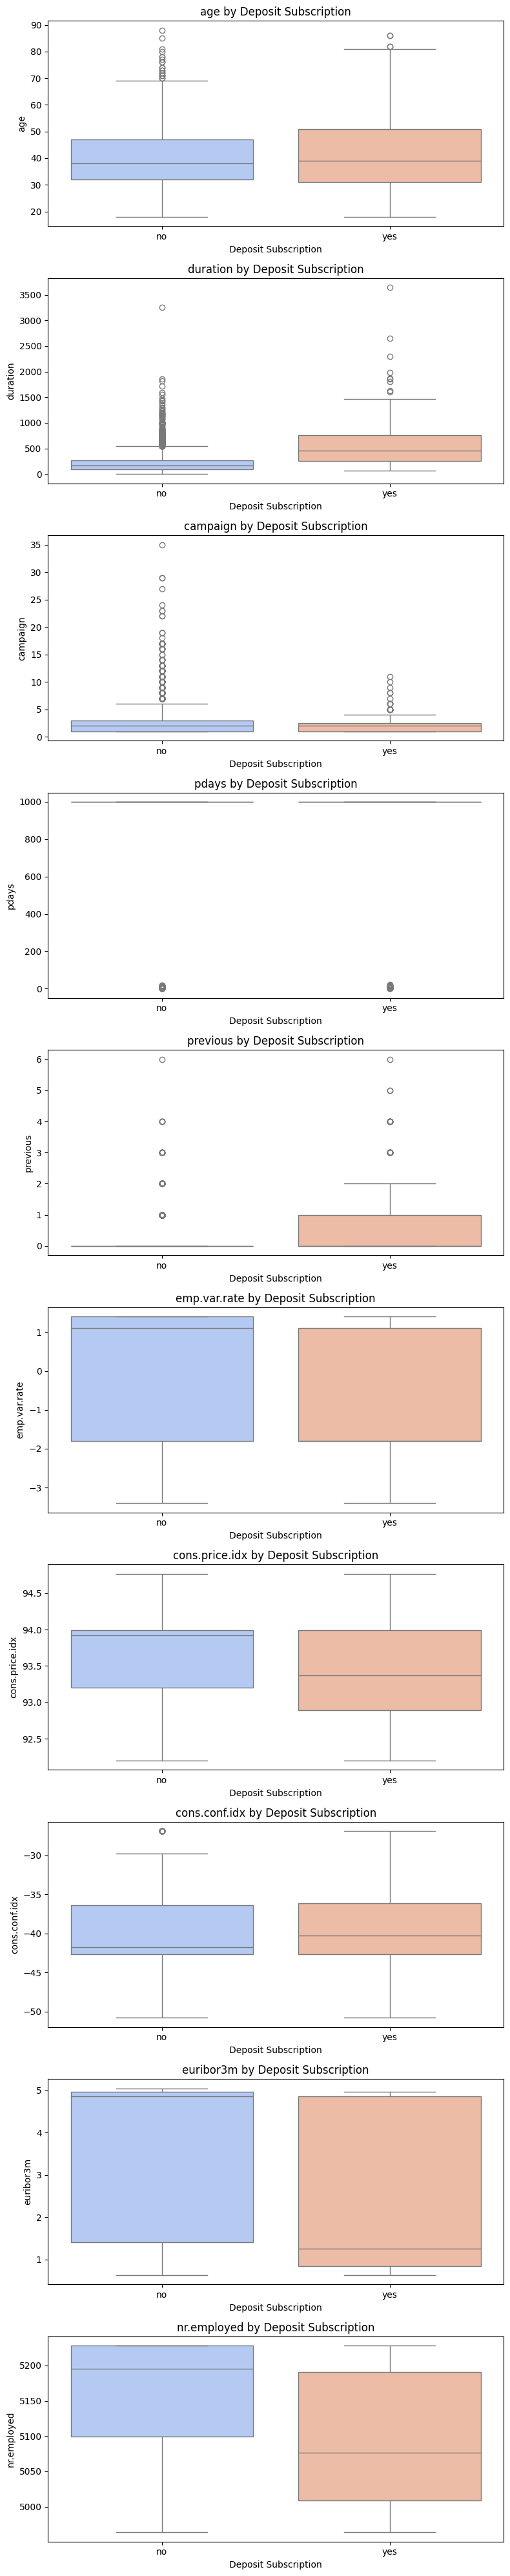

In [15]:
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(8, 4 * len(numerical_cols)))


if len(numerical_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, numerical_cols):
    sns.boxplot(x='y', y=col, data=data, ax=ax, palette='coolwarm')
    ax.set_title(f"{col} by Deposit Subscription")
    ax.set_xlabel('Deposit Subscription')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

##### Categorical Varibles Distribution by Target varible

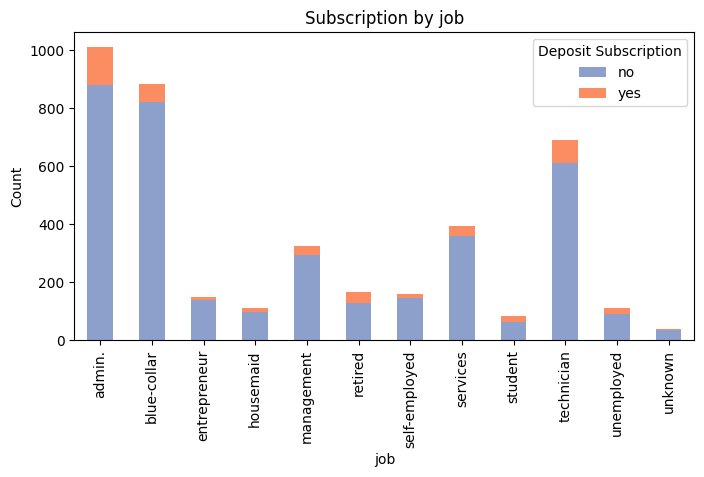

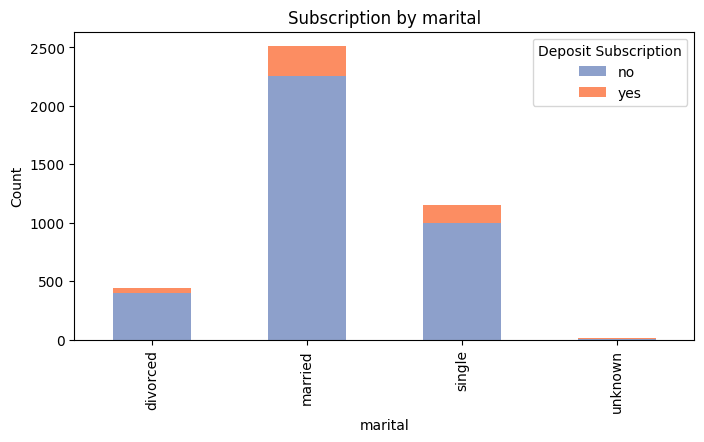

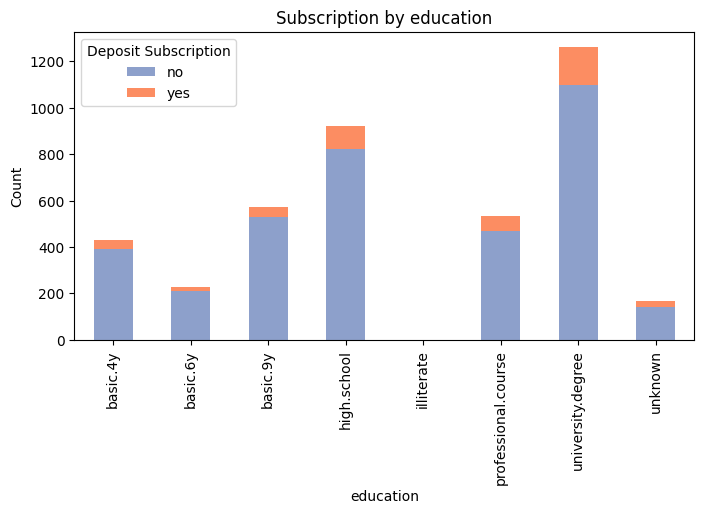

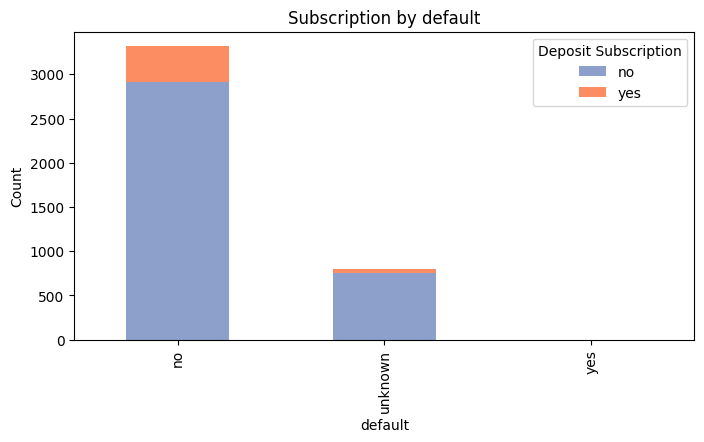

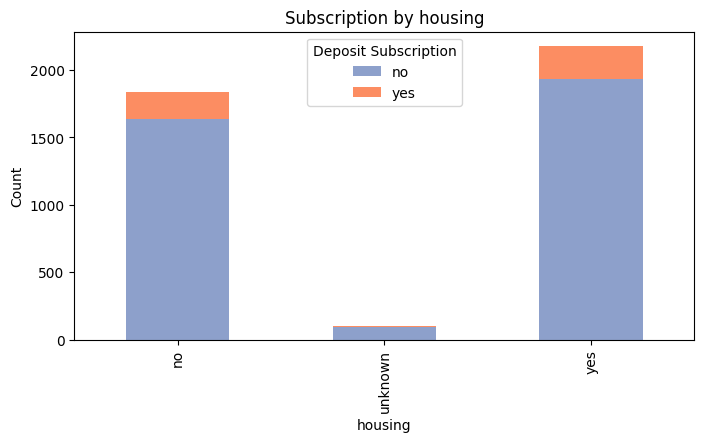

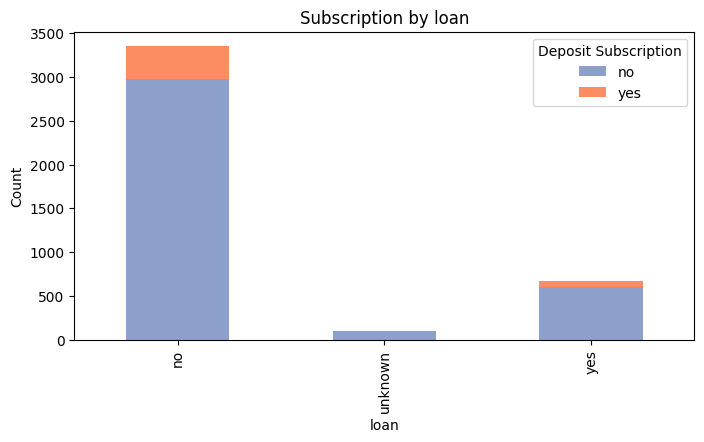

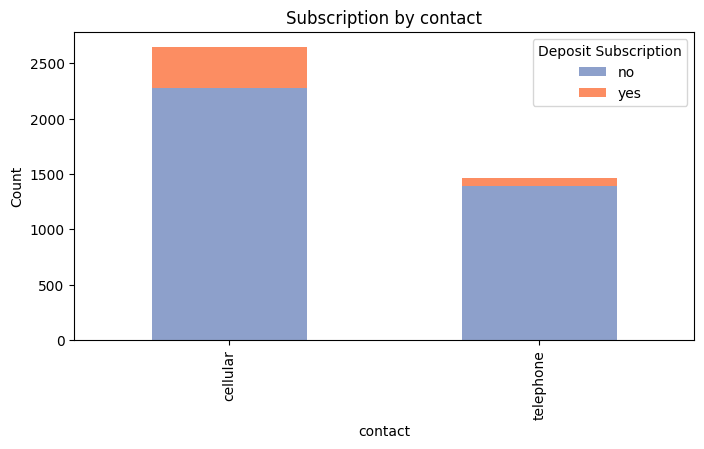

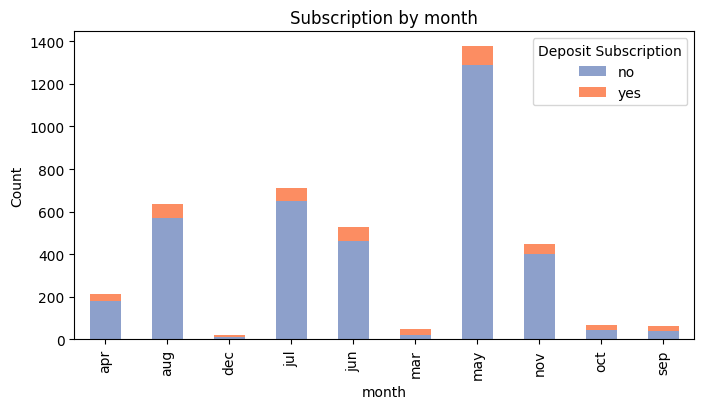

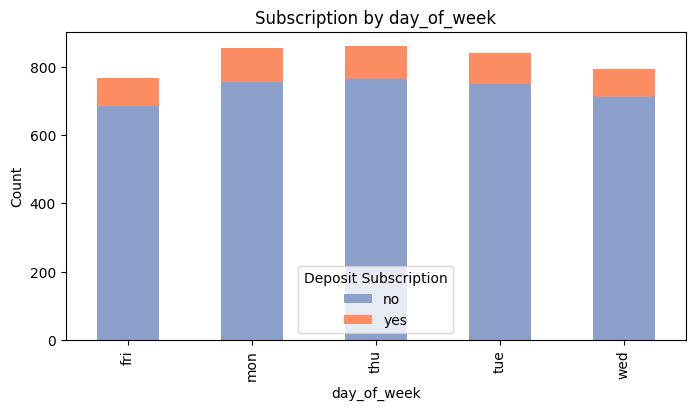

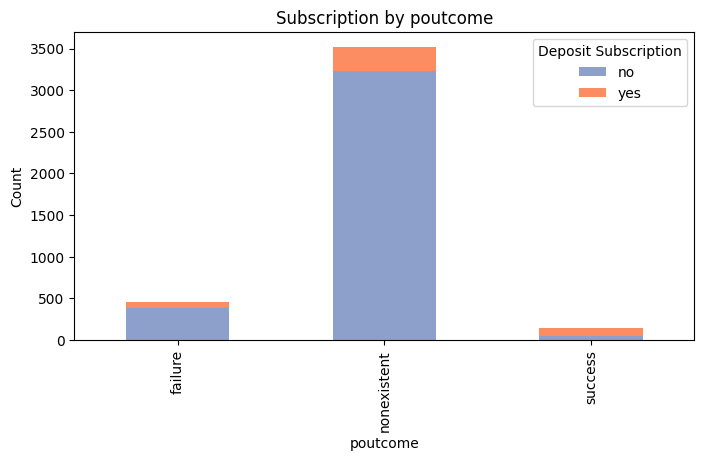

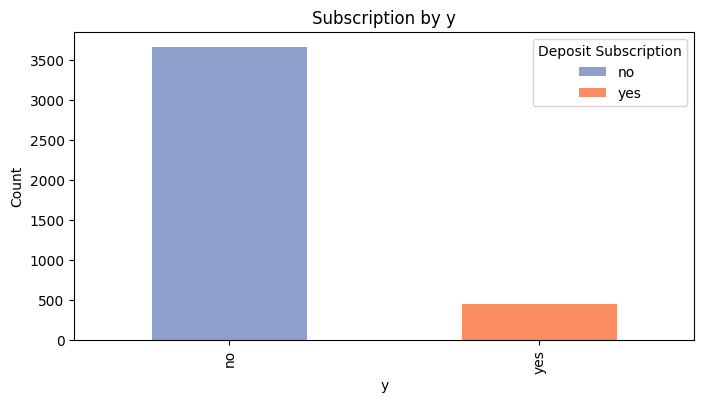

In [16]:
my_colors = ['#8da0cb', '#fc8d62']  

for col in categorical_cols:
    pd.crosstab(data[col], data['y']).plot(
        kind='bar',
        stacked=True,
        figsize=(8, 4),
        color=my_colors  # renkleri burada veriyoruz
    )
    plt.title(f"Subscription by {col}")
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='Deposit Subscription')
    plt.show()

##### heatmaps

In [17]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [18]:
num_data = data[numerical_cols]


In [19]:
#correlation matrix
corr_matrix = num_data.corr()
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


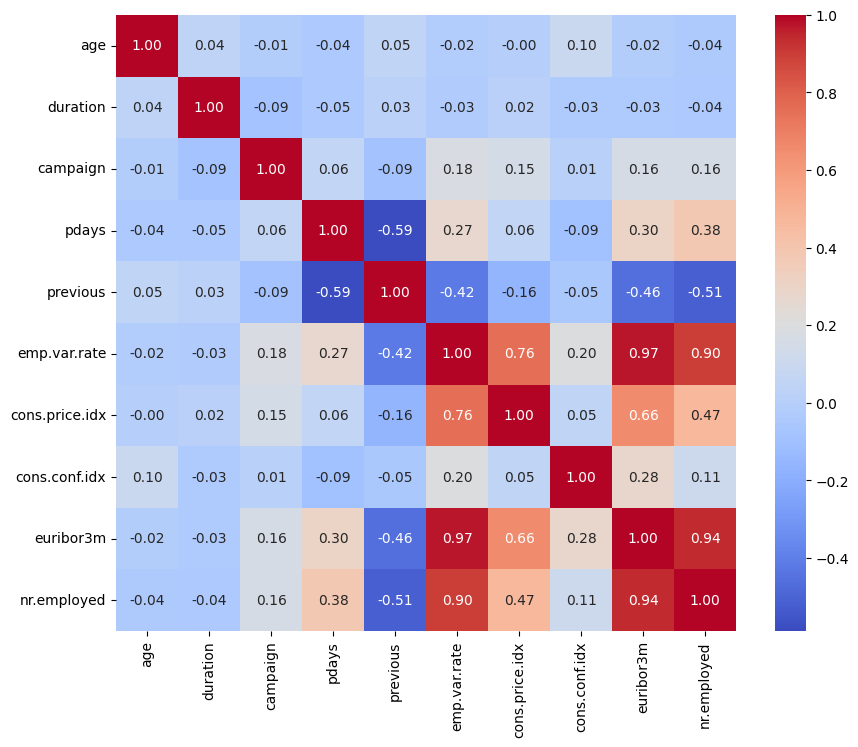

In [20]:
# Heatmap for the numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [21]:
##  our target varible y is not in this heatmap since it is categorical thus lets add the categorical varibles also by encoding.

In [22]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome', 'y']

# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Now df has all categorical columns label encoded

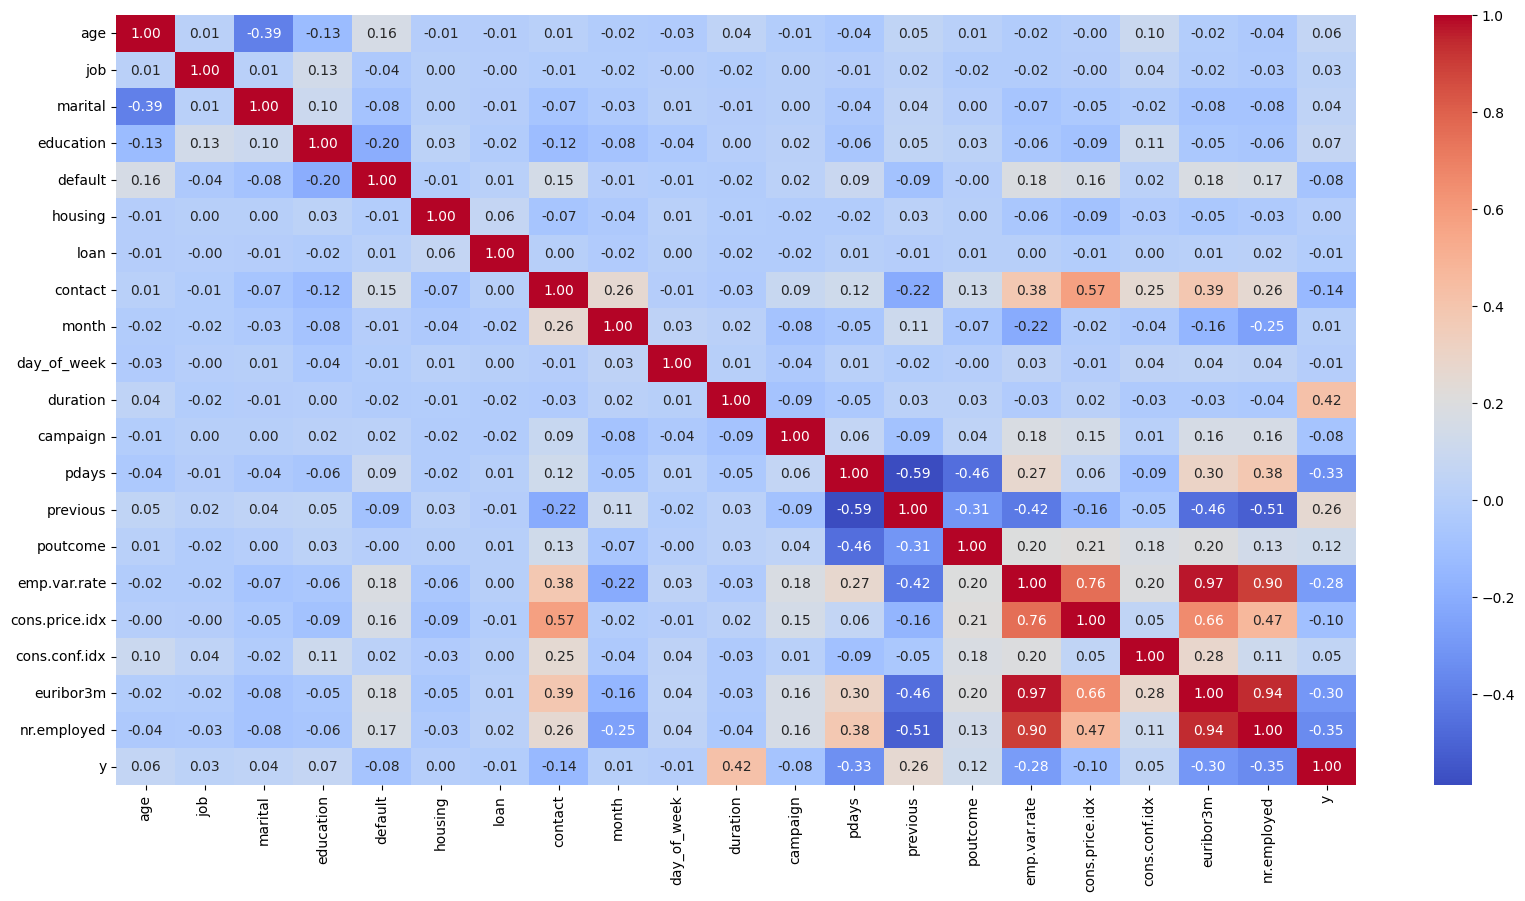

In [23]:
# Heatmap for the numeric features
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

##### According to this heatmap most correlated varibles with y are:
##### duration	+0.42 (positive correlation)
##### nr.employed	-0.35 (negative correlation)
##### pdays -0.33 (negative correlation)
##### euribor3m	-0.30 (negative correlation)
##### emp.var.rate	-0.28 (negative correlation)



### Data Preprocessing

##### There is no empty cell( I checked above) so no need imputation.

##### In this dataset, duration has high correlation with target varible, using duration in model can lead multicollinearity so to avoid it, I will drop.Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful.

In [24]:
#drop duration
data = data.drop('duration', axis=1)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,0,1,3,0,2,0,1,3,0,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,8,2,3,0,0,0,0,6,1,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,0,1,3,0,0,0,0,1,0,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0


In [25]:
## Above, I made encoder to find corr matrix, so  I import data again for later steps

In [26]:
data=pd.read_csv("bank-additional.csv", sep=';')
data = data.drop('duration', axis=1)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [27]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome', 'y']

#### Feature Engineering New Features

##### Adding a new faeture who has high risk if job is student or unemployed and default is yes

In [29]:
data['risky'] = ((data['job'].isin(['unemployed', 'student'])) | (data['default'] == 'yes')).astype(int)

In [30]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,risky
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,1
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0


#### Encoding


#### Type of encoding: OneHot, Label, Ordinal

Tree-based models (DecisionTree, RandomForest, XGBoost) → Label Encoding or One-Hot Encoding (both are OK).

Linear models (Logistic Regression, Linear Regression, SVM) → One-Hot Encoding is better to avoid implying any order.

In [31]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome', 'y', 'risky']

In [32]:
# OneHot Encoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

data = pd.get_dummies(data, columns=categorical_columns)
data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,risky_0,risky_1
0,30,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,False,...,False,False,False,False,True,False,True,False,True,False
1,39,4,999,0,1.1,93.994,-36.4,4.855,5191.0,False,...,False,False,False,False,True,False,True,False,True,False
2,25,1,999,0,1.4,94.465,-41.8,4.962,5228.1,False,...,False,False,True,False,True,False,True,False,True,False
3,38,3,999,0,1.4,94.465,-41.8,4.959,5228.1,False,...,False,False,False,False,True,False,True,False,True,False
4,47,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,True,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,999,0,1.4,93.918,-42.7,4.958,5228.1,True,...,True,False,False,False,True,False,True,False,True,False
4115,39,1,999,0,1.4,93.918,-42.7,4.959,5228.1,True,...,False,False,False,False,True,False,True,False,True,False
4116,27,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,False,...,False,False,False,True,False,False,True,False,False,True
4117,58,1,999,0,1.4,93.444,-36.1,4.966,5228.1,True,...,False,False,False,False,True,False,True,False,True,False


In [33]:
data=pd.read_csv("bank-additional.csv", sep=';')
data = data.drop('duration', axis=1)
data['risky'] = ((data['job'].isin(['unemployed', 'student'])) | (data['default'] == 'yes')).astype(int)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,risky
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,1
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0


In [34]:
#Label Encoder
label = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = label.fit_transform(data[col])
## since I added 'y' to categorical varibles, it also turn to yes to 1 and no to 0.
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,risky
0,30,1,1,2,0,2,0,0,6,0,...,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0,0
1,39,7,2,3,0,0,0,1,6,0,...,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0,0
2,25,7,1,3,0,2,0,1,4,4,...,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0,0
3,38,7,1,2,0,1,1,1,4,0,...,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0,0
4,47,0,1,6,0,2,0,0,7,1,...,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,...,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0,0
4115,39,0,1,3,0,2,0,1,3,0,...,999,0,1,1.4,93.918,-42.7,4.959,5228.1,0,0
4116,27,8,2,3,0,0,0,0,6,1,...,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,0,1
4117,58,0,1,3,0,0,0,0,1,0,...,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0,0


##### label is ok for also tree base model.Onehot added many columns so I will go on with label encoder.

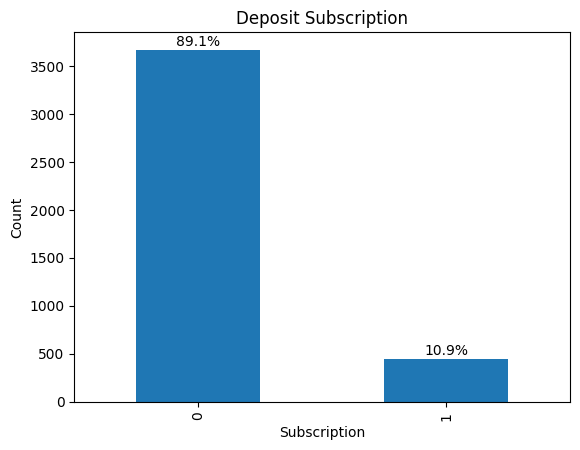

In [35]:
counts = data['y'].value_counts()
# percentage
percentages = data['y'].value_counts(normalize=True) * 100

ax = counts.plot(kind='bar', title='Deposit Subscription')

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    plt.text(i, count + max(counts)*0.01, f'{percentage:.1f}%', ha='center')

plt.ylabel('Count')
plt.xlabel('Subscription')
plt.show()

##### Order of process

Split data into train/test sets	To prevent information leak from test data

Resample (undersampling/oversampling) only on X_train	Balance classes only in training set

Scaling(Fit StandardScaler) only on X_train	Scaler must learn only from training data

Transform X_train and X_test with the scaler	Apply the learned scaling consistently



#### Spliting Data

In [36]:
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = data.drop('y', axis=1)  # y is the target 
data['risky'] = ((data['job'].isin(['unemployed', 'student'])) | (data['default'] == 'yes')).astype(int)
y = data['y']

# Split the data as %20-%80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Sampling

In [37]:
## our target variable is imbalanced, "no" is almost %90, "yes" is %10. Thus we need resample data to get more balanced type.

##### type of sampling: oversampling,undersampling and SMOTE

for using combination of under and over, I use SMOTE


In [38]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X_train, y_train)

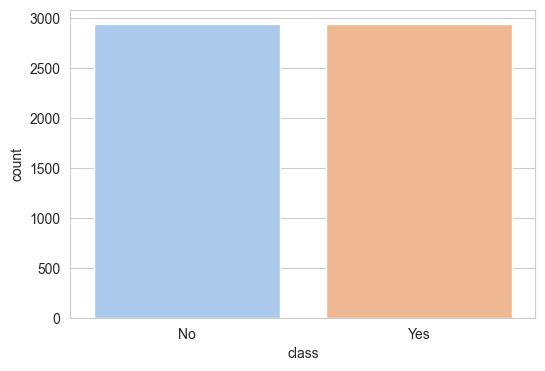

In [39]:
# y_smote verisini DataFrame'e dönüştür
df_smote = pd.DataFrame({"class": y_smote})

# Sayısal sınıfları string olarak etiketle: 0 → "No", 1 → "Yes"
df_smote["class"] = df_smote["class"].map({0: "No", 1: "Yes"})

# Plot
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
ax = sns.countplot(x="class", data=df_smote, palette="pastel")


#### Scaling

##### varibles have different types so we need inputs into similar scales.Scaler types: Standardscaler, maxmin scaler,robust,normalizer
##### use StandardScaler since it is the safest and most common one.

In [41]:



from sklearn.preprocessing import StandardScaler


# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_smote)
X_test_scaled = scaler.transform(X_test)

### Feature Selection

##### I use one of the embedded selection models which are Lasso, Riche and Elastic.For selecting impoartant feautes, Lasso is ok.

In [42]:
# 3. Scaled array'i tekrar DataFrame'e çevir
import pandas as pd
feature_names = X_train.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

In [43]:
from sklearn.linear_model import LassoCV
import numpy as np

# LassoCV automatically tunes alpha with cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled_df, y_smote)

# Get selected features (non-zero coefficients)
selected_features = X_train_scaled_df.columns[lasso.coef_ != 0]

print("Selected features by Lasso:", selected_features)

Selected features by Lasso: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'risky'],
      dtype='object')


In [44]:

# Yeni verisetlerini oluştur

X_train_selected = X_train_scaled_df[selected_features]
X_test_selected = X_test_scaled_df[selected_features]
y_train = y_smote

In [45]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,risky
324,33,1,1,3,0,2,0,1,6,4,1,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
2350,33,6,2,6,0,0,0,1,6,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1391,52,0,1,3,0,0,0,1,6,4,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
468,32,7,2,3,0,1,1,0,6,4,1,999,1,0,-1.8,92.893,-46.2,1.281,5099.1,0
561,39,10,1,6,0,2,0,1,6,2,2,999,0,1,1.1,93.994,-36.4,4.855,5191.0,1


In [46]:
print(X_train_selected.shape[0])
print(len(y_train))               

5872
5872


### Model Selection

##### Logistic Regression	
##### Random Forest	
##### Support Vector Machine (SVM)	
##### K-Nearest Neighbors (KNN)	
##### MLP (Neural Network)
##### XGBoost	

##### Since KNN and SVM are better for small data set, I will try the others:  Logistic Regression, Random Forest, Neural Network, XGBoost

#### 1.Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# trainning  the model 

model_LG = LogisticRegression(max_iter=6000, class_weight='balanced')
model_LG.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred = model_LG.predict(X_test_selected)
y_probs = model_LG.predict_proba(X_test_selected)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8106796116504854
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       732
           1       0.31      0.57      0.40        92

    accuracy                           0.81       824
   macro avg       0.62      0.70      0.64       824
weighted avg       0.87      0.81      0.83       824



In [49]:
## 0= No
## 1= Yes

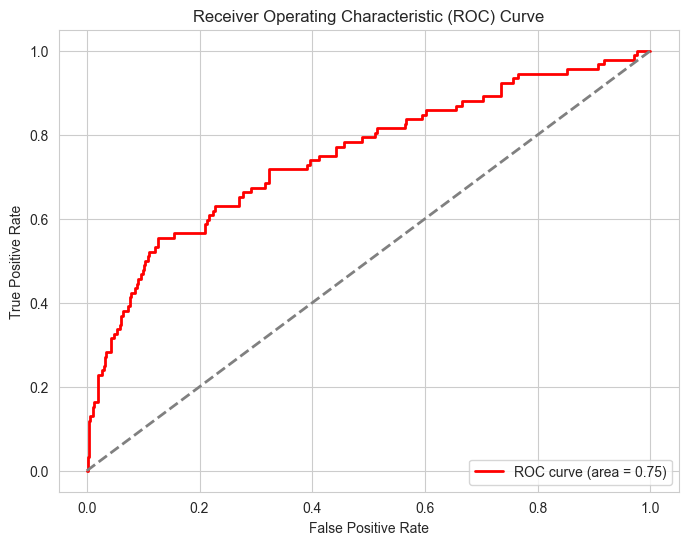

In [50]:
## ROC Curve and AUC Score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs)

## Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 2.Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

# trainning the Random Forest model

model_RF = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_RF.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred_RF = model_RF.predict(X_test_selected)
y_probs_RF = model_RF.predict_proba(X_test_selected)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

Accuracy: 0.8883495145631068
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       732
           1       0.50      0.38      0.43        92

    accuracy                           0.89       824
   macro avg       0.71      0.67      0.69       824
weighted avg       0.88      0.89      0.88       824



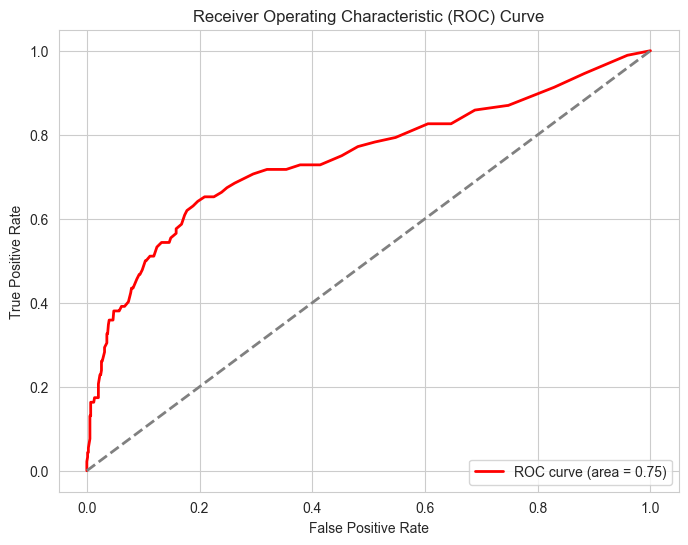

In [52]:
## ROC Curve and AUC Score


fpr, tpr, thresholds = roc_curve(y_test, y_probs_RF, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs_RF)

## Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 3.Neural Network

In [53]:
from sklearn.neural_network import MLPClassifier

# train the neural network model

model_NN = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
model_NN.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred_NN = model_NN.predict(X_test_selected)
y_probs_NN = model_NN.predict_proba(X_test_selected)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred_NN))
print(classification_report(y_test, y_pred_NN))

Accuracy: 0.8483009708737864
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       732
           1       0.35      0.41      0.38        92

    accuracy                           0.85       824
   macro avg       0.64      0.66      0.65       824
weighted avg       0.86      0.85      0.85       824



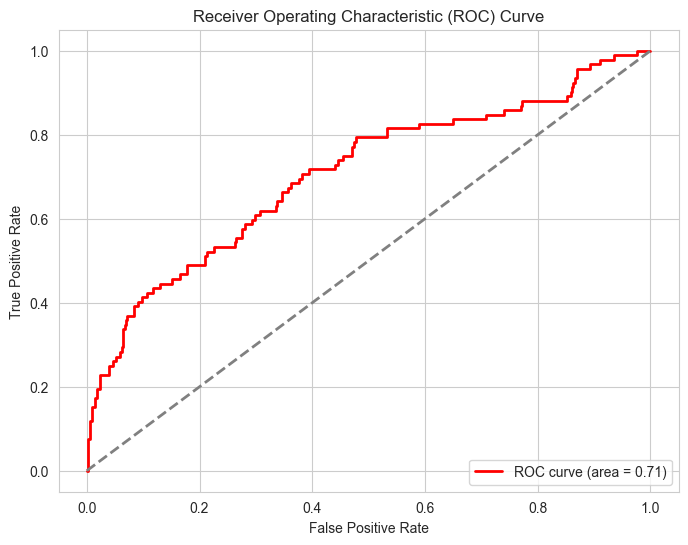

In [54]:
## ROC Curve and AUC Score


fpr, tpr, thresholds = roc_curve(y_test, y_probs_NN, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs_NN)

## Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 4.XGBoost

In [55]:
!pip install xgboost
from xgboost import XGBClassifier
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
# train the neural network model

model_XG = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
model_XG.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred_XG= model_XG.predict(X_test_selected)
y_probs_XG = model_XG.predict_proba(X_test_selected)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred_XG))
print(classification_report(y_test, y_pred_XG))


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       732
           1       0.42      0.29      0.34        92

    accuracy                           0.88       824
   macro avg       0.66      0.62      0.64       824
weighted avg       0.86      0.88      0.87       824



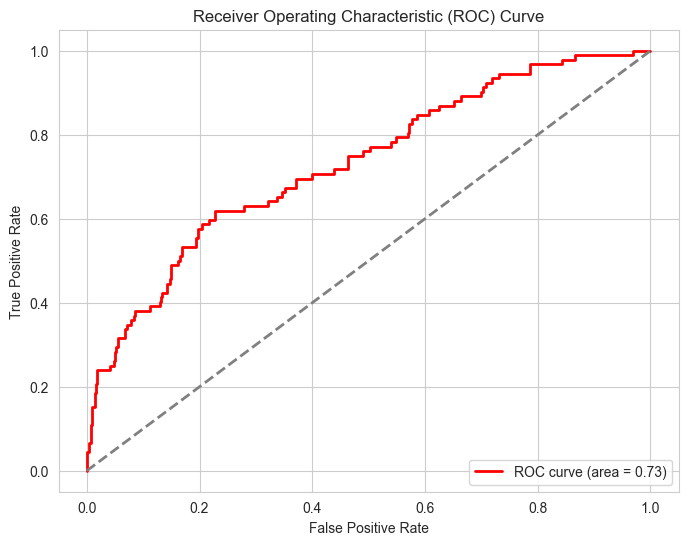

In [56]:
## ROC Curve and AUC Score


fpr, tpr, thresholds = roc_curve(y_test, y_probs_XG, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs_XG)

## Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Model Selection

| Model              | Accuracy | Precision (1) | Recall (1) | F1 (1) |
|--------------------|----------|----------------|------------|--------|
| Random Forest      | 0.893    | 0.50           | 0.38       | 0.43   |
| Logistic Regression| 0.811    | 0.31           | 0.57       | 0.40   |
| XGBoost            | 0.875    | 0.42           | 0.29       | 0.34   |
| Neural Network     | 0.850    | 0.35           | 0.41       | 0.38   |


##### Accuracy is highest in random forest. Recall is the best in Logistic Regression.But its precision is low. (TP/TP+FP)
##### Random forest has higher precision. It has a better F1 score (precision-recall balance)
##### Random forest ROC curve is better since it is higher and left sided more according to others.
#### Thus my model is random forest

### Pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE

### Order of A pipeline
All steps in above, are put in a pipeline: 

encoding

spliting

sampling and scaling.

We already define the model as random forest.

In [59]:
data=pd.read_csv("bank-additional.csv", sep=';')
data = data.drop('duration', axis=1)
data['risky'] = ((data['job'].isin(['unemployed', 'student'])) | (data['default'] == 'yes')).astype(int)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,risky
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,1
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0


In [60]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                      'day_of_week', 'poutcome', 'risky']

In [61]:
#Label Encoder
label = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = label.fit_transform(data[col])

In [62]:
#spliting
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = data.drop('y', axis=1)  # y is the target 
data['risky'] = ((data['job'].isin(['unemployed', 'student'])) | (data['default'] == 'yes')).astype(int)
y = data['y']

# Split the data as %20-%80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_smote)
X_test_scaled = scaler.transform(X_test)
y_smote = LabelEncoder().fit_transform(y_smote)

In [65]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled_df, y_smote)

# Get selected features (non-zero coefficients)
selected_features = X_train_scaled_df.columns[lasso.coef_ != 0]


In [66]:
import pandas as pd
feature_names = X_train.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

In [67]:
from sklearn.linear_model import LassoCV
import numpy as np

# LassoCV automatically tunes alpha with cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled_df, y_smote)

# Get selected features (non-zero coefficients)
selected_features = X_train_scaled_df.columns[lasso.coef_ != 0]

print("Selected features by Lasso:", selected_features)

Selected features by Lasso: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'risky'],
      dtype='object')


In [68]:
# Yeni verisetlerini oluştur

X_train_selected = X_train_scaled_df[selected_features]
X_test_selected = X_test_scaled_df[selected_features]
y_train = y_smote

In [69]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_columns):
        self.categorical_columns = categorical_columns
        self.encoders = {}

    def fit(self, X, y=None):
        for col in self.categorical_columns:
            le = LabelEncoder()
            le.fit(X[col].astype(str))
            self.encoders[col] = le
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.categorical_columns:
            X_copy[col] = self.encoders[col].transform(X_copy[col].astype(str))
        return X_copy

#### Pipeline

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [71]:


# Kategorik ve sayısal sütunlar
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'risky']
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Preprocessor (OrdinalEncoder ile)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ]
)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])  # 'no' → 0, 'yes' → 1
# Pipeline (CustomLabelEncoder yok)
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('scaler', StandardScaler()),
    ('feature_selector', SelectFromModel(LassoCV(cv=5, random_state=42))),
    ('rf', RandomForestClassifier(random_state=42))
])

### Hyperparameter GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, make_scorer


In [73]:
## parammeters for random forest
param_grid = {
    'rf__n_estimators': [100, 200, 300],            # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 30],            # Max depth of trees
    'rf__min_samples_split': [2, 5, 10],            # Min samples to split an internal node
    'rf__min_samples_leaf': [1, 2, 4],              # Min samples at a leaf node
    'rf__max_features': ['sqrt']                  # Whether bootstrap samples are used
}

In [74]:
scorer = make_scorer(f1_score, average='binary')

In [75]:
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)



In [76]:
grid_search.fit(x_smote, y_smote)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome',
                                                                          'risky']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'co...
                                       ('scaler', StandardScaler()),
                                       ('feature_selector',
                                        SelectFromModel(estimator=LassoCV(cv=5,
                                                                          random_state=42))),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__max_features': ['sqrt'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [77]:
from sklearn.metrics import accuracy_score, classification_report
y_test = label_encoder.transform(y_test)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

print("Best hyperparameters:\n", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Best hyperparameters:
 {'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Accuracy: 0.8883495145631068
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       732
           1       0.50      0.36      0.42        92

    accuracy                           0.89       824
   macro avg       0.71      0.66      0.68       824
weighted avg       0.88      0.89      0.88       824



### Evaluation

##### My model accuracay is good however precision( to catch up pozitif) and recall and f1 score  are low

##### To make better it, I will make randomforest class_weight=balance

In [78]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('scaler', StandardScaler()),
    ('feature_selector', SelectFromModel(LassoCV(cv=5, random_state=42))),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])


In [79]:
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_smote, y_smote)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome',
                                                                          'risky']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'co...
                                       ('feature_selector',
                                        SelectFromModel(estimator=LassoCV(cv=5,
                                                                          random_state=42))),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__max_features': ['sqrt'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [80]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

print("Best hyperparameters:\n", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Best hyperparameters:
 {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Accuracy: 0.8932038834951457
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       732
           1       0.53      0.37      0.44        92

    accuracy                           0.89       824
   macro avg       0.73      0.66      0.69       824
weighted avg       0.88      0.89      0.88       824



##### Now precision,recall and f1-score a bit higher.

#### Lastly I look feeature imporatance

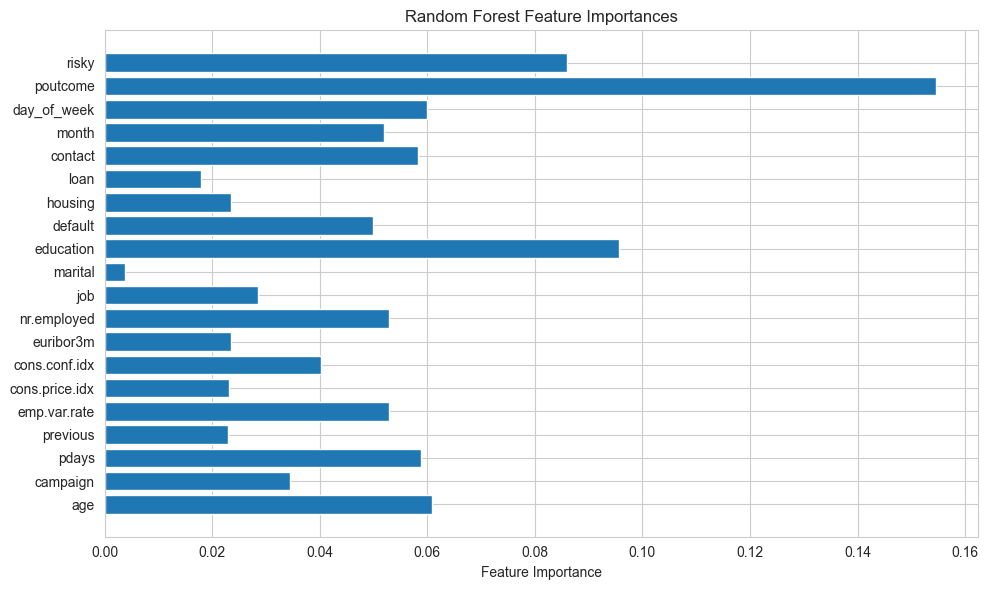

In [82]:
importances = best_model.named_steps['rf'].feature_importances_
feature_names = best_model.named_steps['feature_selector'].get_support(indices=True)
full_feature_names = np.array(numerical_columns + categorical_columns)[feature_names]

plt.figure(figsize=(10,6))
plt.barh(full_feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()